<a href="https://colab.research.google.com/github/h4r1c0t/WildCodeSchool/blob/master/LiveCoding/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"

In [0]:
df_diamonds = pd.read_csv(url)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [0]:
df_diamonds.describe(include = 'all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [0]:
num_col = []

for col in df_diamonds.columns:
  if df_diamonds[col].dtype != "object":
    if col != "price":
      num_col.append(col)

In [0]:
num_col

['carat', 'depth', 'table', 'x', 'y', 'z']

In [0]:
X = df_diamonds[num_col]

In [0]:
scaler = StandardScaler()

In [0]:
X_scaled = scaler.fit_transform(X)

In [0]:
pca = PCA()

In [0]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.explained_variance_ratio_

array([0.65535644, 0.21400867, 0.11389973, 0.0079    , 0.00663336,
       0.0022018 ])

In [0]:
np.cumsum(pca.explained_variance_ratio_)

array([0.65535644, 0.86936511, 0.98326484, 0.99116484, 0.9977982 ,
       1.        ])

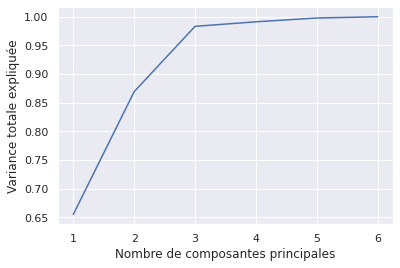

In [0]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance totale expliquée")
plt.show()

In [0]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5
0,0.495367,-0.000682,0.120581,0.500910,0.495218,0.493882
1,-0.045130,-0.734082,0.669827,-0.008204,-0.009657,-0.101283
2,-0.027908,0.671001,0.732523,-0.069979,-0.086227,0.007509
3,-0.789965,0.014030,0.013456,-0.040759,0.537622,0.291338
4,-0.160215,-0.088358,-0.002961,0.048632,-0.635140,0.748831
5,0.319502,-0.053638,0.003431,-0.860290,0.234074,0.316450


In [0]:
num_col

['carat', 'depth', 'table', 'x', 'y', 'z']

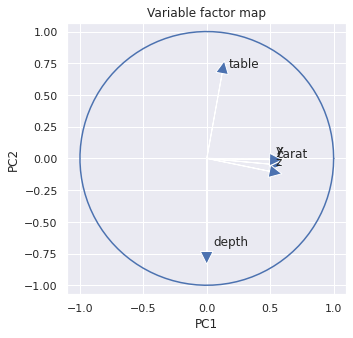

In [0]:
#@title
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(5, 5))
for i in range(0, len(pca.components_)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
            pca.components_[1, i] + 0.05,
            num_col[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()